In [50]:
import scanpy as sc 
import tangram as tg
import pandas as pd 
import numpy as np 

In [3]:
#ad_sp = sc.read_h5ad(path)
#ad_sc = sc.read_h5ad(path)

ad_sp=sc.read('Blank_genes_removed.csv').transpose()
ad_sp.var_names_make_unique()
#adata.var['mt'] = adata.var_names.str.startswith('MT-')  #



In [76]:
'''
csvfilename='Food-Allergy-LP_normalized_matrix.txt'
adataLP=sc.read(csvfilename).transpose()
csvfilename='Food-Allergy-PP_normalized_matrix.txt'
adataPP=sc.read(csvfilename).transpose()
ad_sc=adataPP.concatenate(adataLP)
'''
ad_sc=sc.read_mtx('countTable_mouseStSt/matrix.mtx.gz').transpose()
#ad_sc_all=sc.read_10x_mtx('countTable_mouseStSt/')

In [77]:
ad_sp

AnnData object with n_obs × n_vars = 395215 × 347

In [78]:
print(ad_sc)

AnnData object with n_obs × n_vars = 389056 × 31053


In [115]:
cellname=pd.read_csv('countTable_mouseStSt/barcodes.tsv',header=None)
genename=pd.read_csv('countTable_mouseStSt/features.tsv',header=None)
cellname=cellname.to_numpy()
genename=genename.to_numpy()
print(len(cellname),len(genename),cellname.shape,genename.shape)
print(len(ad_sc.obs_names),len(ad_sc.var_names))
ad_sc.obs_names=cellname[:,0]
ad_sc.var_names=genename[:,0]


389056 31053 (389056, 1) (31053, 1)
389056 31053


In [116]:
sc_cellname=ad_sc.obs_names.to_numpy()
sc_genename=ad_sc.var_names.to_numpy()
print(len(sc_cellname),len(sc_genename),sc_cellname[0:5],sc_genename[0:5])

389056 31053 ['AAACCTGAGAGCCCAA-1' 'AAACCTGAGCTAGTCT-1' 'AAACCTGAGTTCGCGC-1'
 'AAACCTGCAACACCCG-1' 'AAACCTGCATAGGATA-1'] ['Xkr4' 'Gm1992' 'Gm37381' 'Rp1' 'Sox17']


In [117]:
sp_cellname=ad_sp.obs_names.to_numpy()
sp_genename=ad_sp.var_names.to_numpy()
print(len(sp_cellname),len(sp_genename),sp_cellname[0:5],sp_genename[0:5])

395215 347 ['cell0' 'cell1' 'cell2' 'cell3' 'cell4'] ['Comt' 'Ldha' 'Pck1' 'Akr1a1' 'Ugt2b1']


In [118]:
annot=pd.read_csv('annot_mouseStStAll.csv')
data=annot.to_numpy()
all_barcode_cell_name=data[:,5]
print(all_barcode_cell_name[0:5])

['AAACCTGAGTTCGCGC-1' 'AAACCTGGTGAGGCTA-1' 'AAACCTGTCGGTGTCG-1'
 'AAACGGGAGTACGCGA-1' 'AAACGGGCAGTATGCT-1']


In [119]:
index=[]
d={}
for j in range(len(sc_cellname)):
    name=sc_cellname[j]
    d[name]=j
    
for i in range(len(all_barcode_cell_name)):
    name=all_barcode_cell_name[i]
    index.append(d[name])

print(len(index),len(all_barcode_cell_name),min(index),max(index),index[0:10])

185894 185894 0 389053 [2, 8, 9, 13, 17, 27, 28, 36, 50, 53]


In [120]:
print(ad_sc.X.shape)
new_ad_sc=ad_sc[index,:]
print(new_ad_sc)

(389056, 31053)
View of AnnData object with n_obs × n_vars = 185894 × 31053


In [121]:
#cell by gene matrix 
print('sc data', ad_sc.shape)
print('Sp data', ad_sp.shape)
print('new sc data', new_ad_sc.shape)



sc data (389056, 31053)
Sp data (395215, 347)
new sc data (185894, 31053)


In [122]:
ad_sc.var.index

Index(['Xkr4', 'Gm1992', 'Gm37381', 'Rp1', 'Sox17', 'Gm37323', 'Mrpl15',
       'Lypla1', 'Gm37988', 'Tcea1',
       ...
       'AC125149.1', 'AC125149.2', 'AC125149.4', 'AC234645.1', 'AC168977.2',
       'AC168977.1', 'AC149090.1', 'CAAA01118383.1', 'Vmn2r122',
       'CAAA01147332.1'],
      dtype='object', length=31053)

In [123]:
tg.pp_adatas(new_ad_sc, ad_sp, genes=None)

INFO:root:344 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:344 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [ ]:
ad_map = tg.map_cells_to_space(new_ad_sc, ad_sp)


INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 344 genes and rna_count_based density_prior in cells mode...


In [9]:
ad_ge = tg.project_genes(ad_map, new_ad_sc)


In [18]:
ad_map.var

,uniform_density,rna_count_based_density
cell1,0.000135,0.000053
cell2,0.000135,0.000087
cell3,0.000135,0.000088
cell4,0.000135,0.000197
cell5,0.000135,0.000140
...,...,...
cell8165,0.000135,0.000015
cell8166,0.000135,0.000018
cell8167,0.000135,0.000015
cell8176,0.000135,0.000015


In [20]:
#tutorial https://github.com/broadinstitute/Tangram/blob/master/tutorial_tangram_without_squidpy.ipynb

ad_ge

AnnData object with n_obs × n_vars = 7416 × 15971
    obs: 'uniform_density', 'rna_count_based_density'
    var: 'n_cells', 'sparsity', 'is_training'
    uns: 'training_genes', 'overlap_genes'

In [11]:
df=pd.DataFrame(data=ad_ge.X.transpose(), index=ad_ge.var_names , columns=ad_ge.obs_names)
df.to_csv("sc_genes_spatial_cell.csv")

In [10]:
ad_ge.write_h5ad("sc_genes_spatial_cell.h5ad")


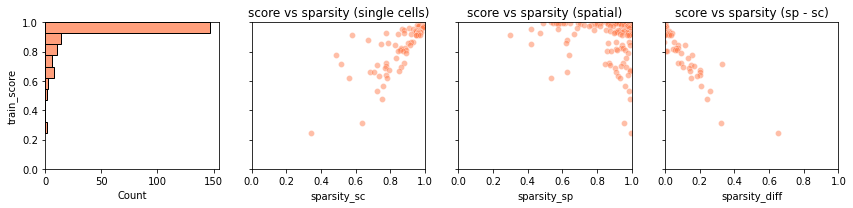

In [13]:
tg.plot_training_scores(ad_map, bins=10, alpha=.5)


In [26]:
import numpy as np 
ctname=pd.read_csv('scNameOfCT.dat',sep='\t',index_col=0,header=None)
ctname=ctname.to_numpy()
sc_cluster_names=ctname[:,0]
#print(sc_cluster_names)

sc_cluster= pd.read_csv('Food-Allergy-PP-LP_cluster_v1.txt',sep='\t',index_col=0,header=1)
sc_cluster=sc_cluster.to_numpy()
a=np.unique(sc_cluster)
print('SC clusters',sc_cluster.shape,len(a),len(sc_cluster_names))
ad_sc.obs['subclass_label'] = sc_cluster.astype(str)

ad_sc.obs['subclass_label']=  ad_sc.obs['subclass_label'].astype('category')
ad_sc.obs['subclass_label'] = ad_sc.obs['subclass_label'].cat.rename_categories(sc_cluster_names)

ad_sc.obs.subclass_label.value_counts()


assert ad_sc.uns['training_genes'] == ad_sp.uns['training_genes']

SC clusters (58067, 1) 46 46


Resting CD4+ T cell                7194
Resting B cell (low UMI count)     5662
CD4+ T cell (low UMI count)        5315
Doublets3                          4256
ILC2                               4067
Unresolved2                        3663
Activated CD4+ T cell              3139
Basophil                           2481
Doublets2                          2340
LTi cell                           2193
T precursor-like cell              2107
Lymphatic endothelial-like cell    1857
Resting B cell                     1785
pDC                                1441
ILC3                               1255
NKT cell                           1177
DC (CD103+CD11b+)                   930
ILC3 (low UMI count)                919
CD8+ T cell                         883
NK cell                             686
Plasma cell                         381
GCBcell(DZ)                         377
LTi cell (low UMI count)            363
Endothelial cell                    344
γσ T cell (Xcl1+)                   297


In [28]:
#tg.project_cell_annotations(ad_map, ad_sp,annotation='subclass_label')
annotation_list = list(pd.unique(ad_sc.obs['subclass_label']))
tg.plot_cell_annotation_sc(ad_sp, annotation_list,x='x', y='y',spot_size= 60, perc=0.001)

KeyError: 'tangram_ct_pred'